In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
xls = pd.read_excel('Hospital_da_Luz_Base_de_dados_Lenstar_Cassini.xls', sheet_name=None)
cassini = xls['Cassini_full']
lenstar = xls['Lenstar']

In [3]:
#Tratamento de dados Cassini
""" 
    ?Remover Quality Factor Posterior Value inferior a 80?
    Remover olhos repetidos (NHC e olho igual), mantendo o de maior QFPV
    Remover Pseudophakic
"""

filtered_cassini = cassini[cassini['Quality_Factor_Posterior_Value'] >= 80]
filtered_cassini = filtered_cassini.sort_values(by=['Quality_Factor_Posterior_Value'], ascending=[True])
filtered_cassini = filtered_cassini.drop_duplicates(subset=['NHC', 'C_Eye'], keep='last')
filtered_cassini = filtered_cassini.sort_values(by=['id'], ascending=[True])
filtered_cassini = filtered_cassini[filtered_cassini['C_Mode'] != 'Pseudophakic']

In [4]:
print(len(cassini))
print(len(filtered_cassini))
filtered_cassini.to_excel('filtered_cassini.xlsx', index=False, sheet_name='cassini')

1093
607


In [5]:
#Tratamento de dados Lenstar
""" 
    Remover olhos repetidos (NHC e olho igual), escolha arbitrária
    Remover Pseudophakic e Aphakic
"""

filtered_lenstar = lenstar[lenstar['L_Mode'] != 'Pseudophakic']
filtered_lenstar = filtered_lenstar[filtered_lenstar['L_Mode'] != 'Aphakic']
filtered_lenstar = filtered_lenstar.drop_duplicates(subset=['NHC', 'L_Eye'], keep='last')

In [6]:
print(len(lenstar))
print(len(filtered_lenstar))
filtered_lenstar.to_excel('filtered_lenstar.xlsx', index=False, sheet_name='lenstar')

3858
3593


In [7]:
"""
    Merge cassini e lenstar com base em NHC
"""
cassini_lenstar = pd.merge(filtered_lenstar,filtered_cassini, on='NHC', how='outer')
cassini_lenstar.to_excel('cassini_lenstar.xlsx', index=False, sheet_name='merge')

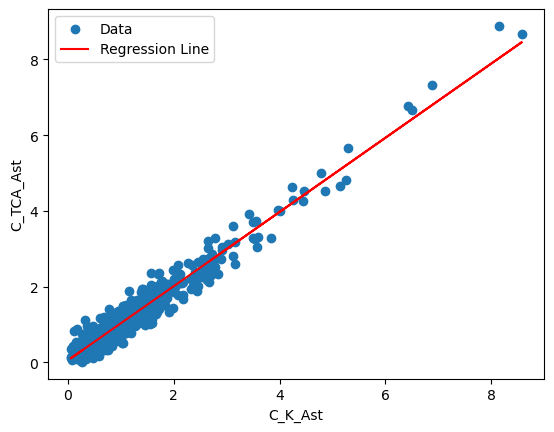

In [9]:
x = filtered_cassini['C_K_Ast']
y = filtered_cassini['C_TCA_Ast']

coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

plt.scatter(x, y, label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')

plt.xlabel('C_K_Ast')
plt.ylabel('C_TCA_Ast')
plt.legend()

# Show the plot
plt.show()

In [ ]:
"""Objetivo: relacionar KA lenstar com TCA cassini
   1 - Dentro do cassini relacionar valores do anterior com TCA"""